In [104]:
# Group 5
# Neel Gandhi, Sunishka Jain, Daniel Shen, Julian Wu

# Imports
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
# Import data

file = './clinvar_conflicting.csv'
data = pd.read_csv(file)

C:\Users\julianxywu\AppData\Local\Temp\ipykernel_12768\3830987800.py:4: DtypeWarning: Columns (0,38,40) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file)


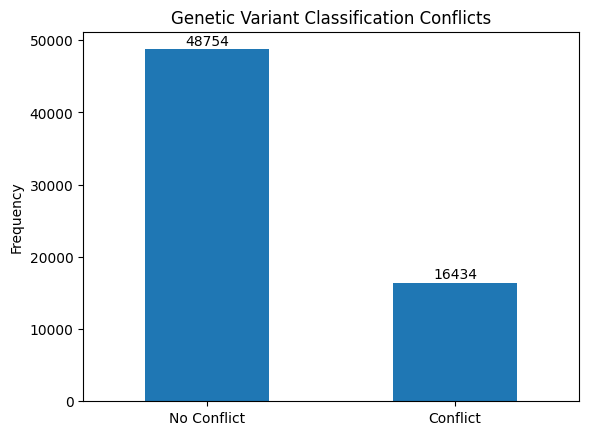

In [71]:
# Graph 1: Show the frequency of genetic variant classification conflicts

ax = data["CLASS"].value_counts().plot.bar(title="Genetic Variant Classification Conflicts")
plt.ylabel("Frequency")
labels = ["No Conflict", "Conflict"]
plt.xticks([0, 1], labels, rotation='horizontal')

# Show the count above each bar
# Adapted from: https://stackoverflow.com/questions/66283061/how-to-add-the-total-count-on-top-of-bar-graph-using-python
for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = "{:.0f}".format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')
plt.show()

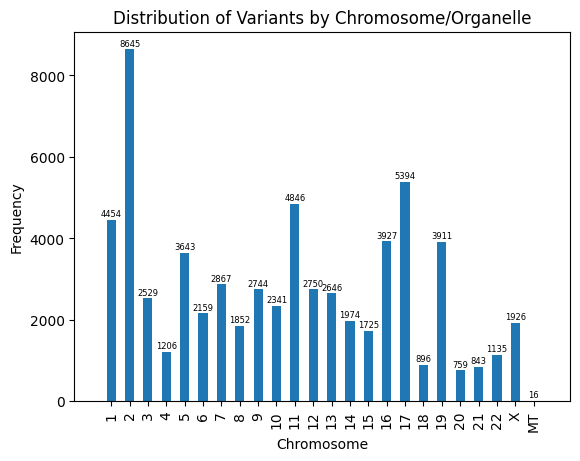

In [72]:
# Graph 2 - Distribution of variants by chromosome/organelle

chromosomes = data['CHROM']

# Clean up data
dict = {}
for c in chromosomes:
    c = str(c)
    if c in dict:
        dict[c] += 1
    else:
        dict[c] = 1

df = pd.DataFrame(columns=['Chromosome', 'Count'])

for key in dict:
    df.loc[len(df.index)] = [key, dict[key]]

# Make the graph look pretty
ax = df.plot.bar(x='Chromosome', width=0.5, legend=False,
                title="Distribution of Variants by Chromosome/Organelle")
ax.margins(.05)
ax.set_xlim([-2, 25])
plt.ylabel("Frequency")

# Show the count above each bar
for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = "{:.0f}".format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), 
                textcoords="offset points", ha='center', va='bottom',
                fontsize=6)
plt.show()

Text(0.5, 1.0, 'Distribution of Point Substitution Mutations')

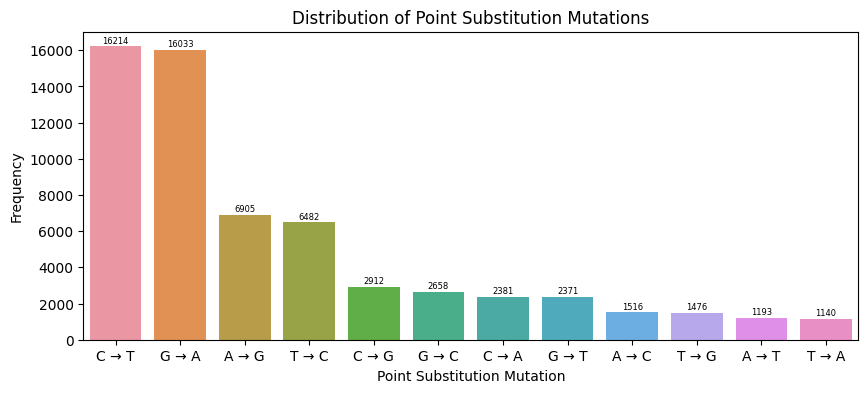

In [121]:
# Graph 3: Distribution of Point Mutations

ref = data['REF']
alt = data['ALT']

# Clean up data (getting rid any lines with multi-base mutations)
dict = {}

for i in range(len(ref)):
    if len(ref[i]) == 1 and len(alt[i]) == 1:
        key = str(ref[i]) + " → " + str(alt[i])
        if key in dict:
            dict[key] += 1
        else:
            dict[key] = 1

df = pd.DataFrame(columns=['Point Substitution Mutation', 'Count'])
for key in dict:
    df.loc[len(df.index)] = [key, dict[key]]

# Plot the data
plt.figure(figsize=(10, 4))

plots = sns.barplot(x='Point Substitution Mutation', y='Count', 
                    data=df, order=df.sort_values('Count', 
                    ascending=False)['Point Substitution Mutation'])

# Show the count above each bar
for rect in plots.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = "{:.0f}".format(y_value)
    plots.annotate(label, (x_value, y_value), xytext=(0, space), 
                textcoords="offset points", ha='center', va='bottom',
                fontsize=6)

# Make the graph look pretty
plt.ylabel("Frequency")
plt.xticks(rotation='horizontal')
plt.title("Distribution of Point Substitution Mutations")


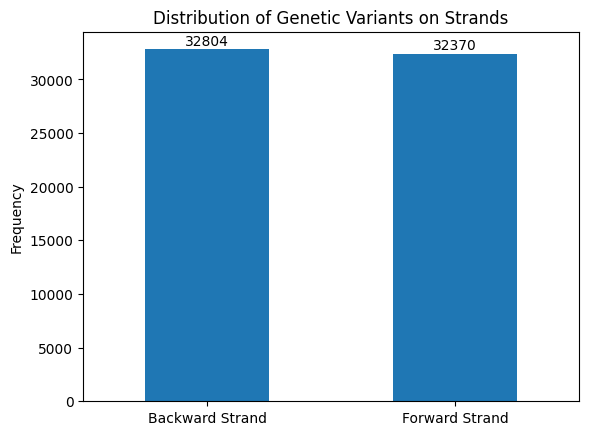

In [126]:
# Graph 4: Forward & Backward Strands

strand = data['STRAND']

ax = strand.value_counts().plot.bar(title="Distribution of Genetic Variants on Strands")
plt.ylabel("Frequency")
labels = ["Backward Strand", "Forward Strand"]
plt.xticks([0, 1], labels, rotation='horizontal')

# Show the count above each bar
for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = "{:.0f}".format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')
plt.show()


In [195]:
def cleanVariantName(name):
    parts = name.split("&")

    for i in range(len(parts)):
        parts[i] = parts[i].capitalize()
    
    name = ' & '.join(parts)

    name = name.replace("_variant", "")
    parts = name.split('_')
    for i in range(len(parts)):
        parts[i] = parts[i][0].upper() + parts[i][1:]
    
    return ' '.join(parts)


Text(0.5, 1.0, 'Top 10 Most Common Variant Types')

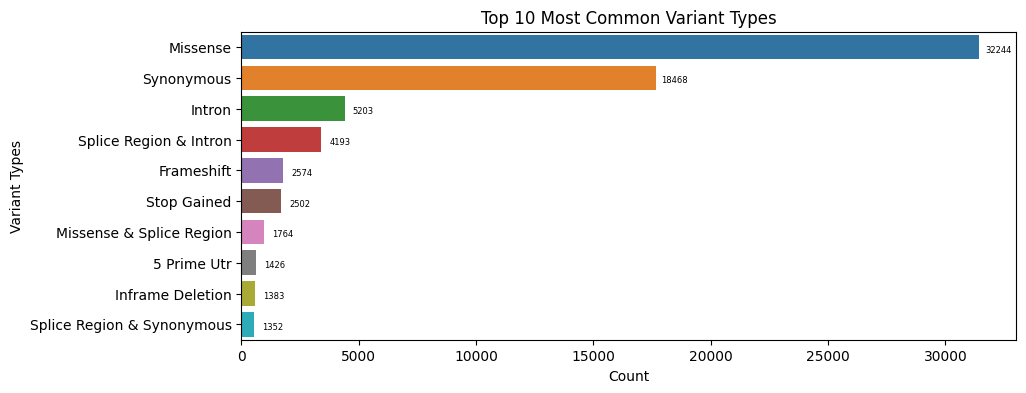

In [194]:

# Graph 5: Top 10 most common variant types

variantTypes = data['Consequence']

# Clean up data and populate df
dict = {}

for i in range(len(variantTypes)):
    key = str(variantTypes[i])
    key = cleanVariantName(key) # Get a cleaner name for the graph
    if key in dict:
        dict[key] += 1
    else:
        dict[key] = 1

df = pd.DataFrame(columns=['Variant Types', 'Count'])
for key in dict:
    df.loc[len(df.index)] = [key, dict[key]]

# Plot the data
plt.figure(figsize=(10, 4))

plots = sns.barplot(x='Count', y='Variant Types', 
                    data=df, 
                    order=df.sort_values('Count', ascending=False).iloc[:10]['Variant Types'])

# Show the count next to each bar
for rect in plots.patches:
    y_value = rect.get_y() + (rect.get_height() / 1.2)
    x_value = rect.get_width() + 800
    space = 1
    label = "{:.0f}".format(x_value)
    plots.annotate(label, (x_value, y_value), xytext=(0, space), 
                textcoords="offset points", ha='center', va='bottom',
                fontsize=6)

# Make the graph look pretty
plt.ylabel("Variant Types")
plt.xticks(rotation='horizontal')
plt.title("Top 10 Most Common Variant Types")

